Профессия Data Science => Блок 1. Знакомство с данными. Python для анализа данных => PYTHON-13. Визуализация данных

Вам представлены данные об оттоке клиентов некоторого банка.

In [1]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import numpy as np
import plotly
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
print("plotly.__version__", plotly.__version__)
import nbformat
print("nbformat.__version__", nbformat.__version__)

plotly.__version__ 5.18.0
nbformat.__version__ 5.9.2


In [2]:
churn_data = pd.read_csv('data/churn.csv')
churn_data_df = churn_data.copy() #Создаём копию
churn_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Столбцы таблицы:

RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
CustomerId — идентификатор клиента
Surname — фамилия клиента
CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
Geography — страна клиента (банк международный)
Gender — пол клиента
Age — возраст клиента
Tenure — сколько лет клиент пользуется услугами банка
Balance — баланс на счетах клиента в банке
NumOfProducts — количество услуг банка, которые приобрёл клиент
HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
EstimatedSalary — предполагаемая заработная плата клиента
Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

ЗАДАНИЯ

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Подсказка
9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [3]:
"""Подготовка данных
"""
#Удаляем ненужный столбец
"""churn_data_df.drop('RowNumber', axis=1, inplace=True)
churn_data_df.drop('CustomerId', axis=1, inplace=True)
churn_data_df.drop('Surname', axis=1, inplace=True)"""

#присваиваем данным признак категории
churn_data_df[['Geography', 'Gender', "HasCrCard", 'IsActiveMember', 'Exited']] = \
    churn_data_df[['Geography', 'Gender', "HasCrCard", 'IsActiveMember', 'Exited']].astype('category')
churn_data_df[['Exited']] = churn_data_df[['Exited']].astype('category')

"""# Условие для удаления строк
condition = (churn_data_df['Age'] > 56) & (churn_data_df['Exited'] == 0)
# Удаление строк, удовлетворяющих условию
churn_data_df = churn_data_df.drop(churn_data_df[condition].index)

# Условие для удаления строк
condition = (churn_data_df['Age'] > 70) & (churn_data_df['Exited'] == 1)
# Удаление строк, удовлетворяющих условию
churn_data_df = churn_data_df.drop(churn_data_df[condition].index)"""

churn_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  category
 11  IsActiveMember   10000 non-null  category
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  category
dtypes: category(5), float64(2), int64(6), object(1)
memory usage: 752.7+ KB


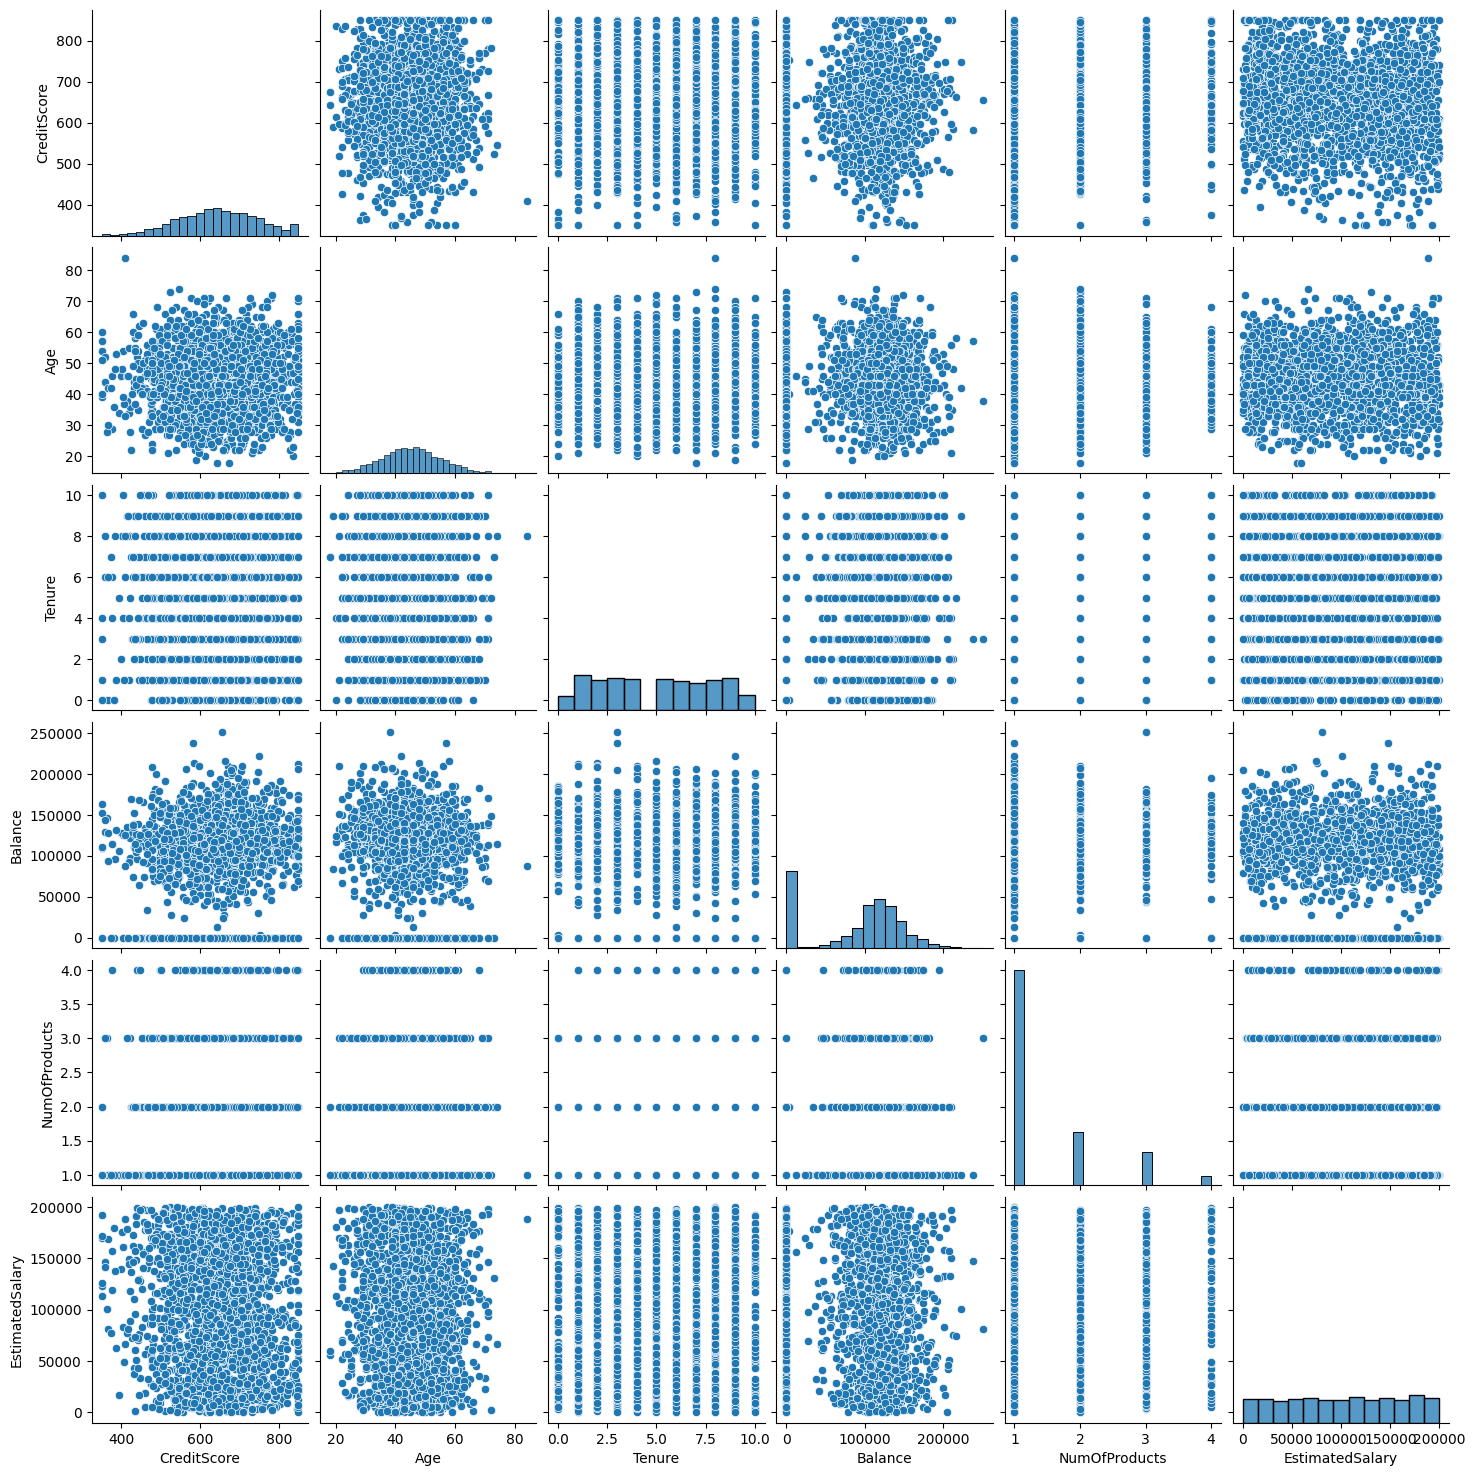

In [4]:
"""ЗАДАНИЕ 9.1.
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.
"""
#Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент) ПУЗЫРЬКИ РАЗНОГО ЦВЕТА
#CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
#Tenure — сколько лет клиент пользуется услугами банка

"""строить матрицу из диаграмм рассеяния
для всех пар числовых признаков, а на диагонали этой матрицы отображаются гистограммы.
#pairplot()
http://seaborn.pydata.org/tutorial/axis_grids.html"""

# Применяем фильтр, чтобы исключить строки, где "Exited" равно 0
numeric_columns = churn_data_df[churn_data_df["Exited"] == 1]

#numeric_columns = churn_data_df[churn_data_df["Age"] > 56]

#numeric_columns = churn_data_df.select_dtypes(include=['float64', 'int64'])
numeric_columns = numeric_columns[["CreditScore", "Age","Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]]

# Удалим строки с пропущенными значениями, чтобы pairplot мог корректно работать
numeric_columns = numeric_columns.dropna()

# Создаем графики рассеяния с помощью pairplot
sns.pairplot(numeric_columns)
plt.show()

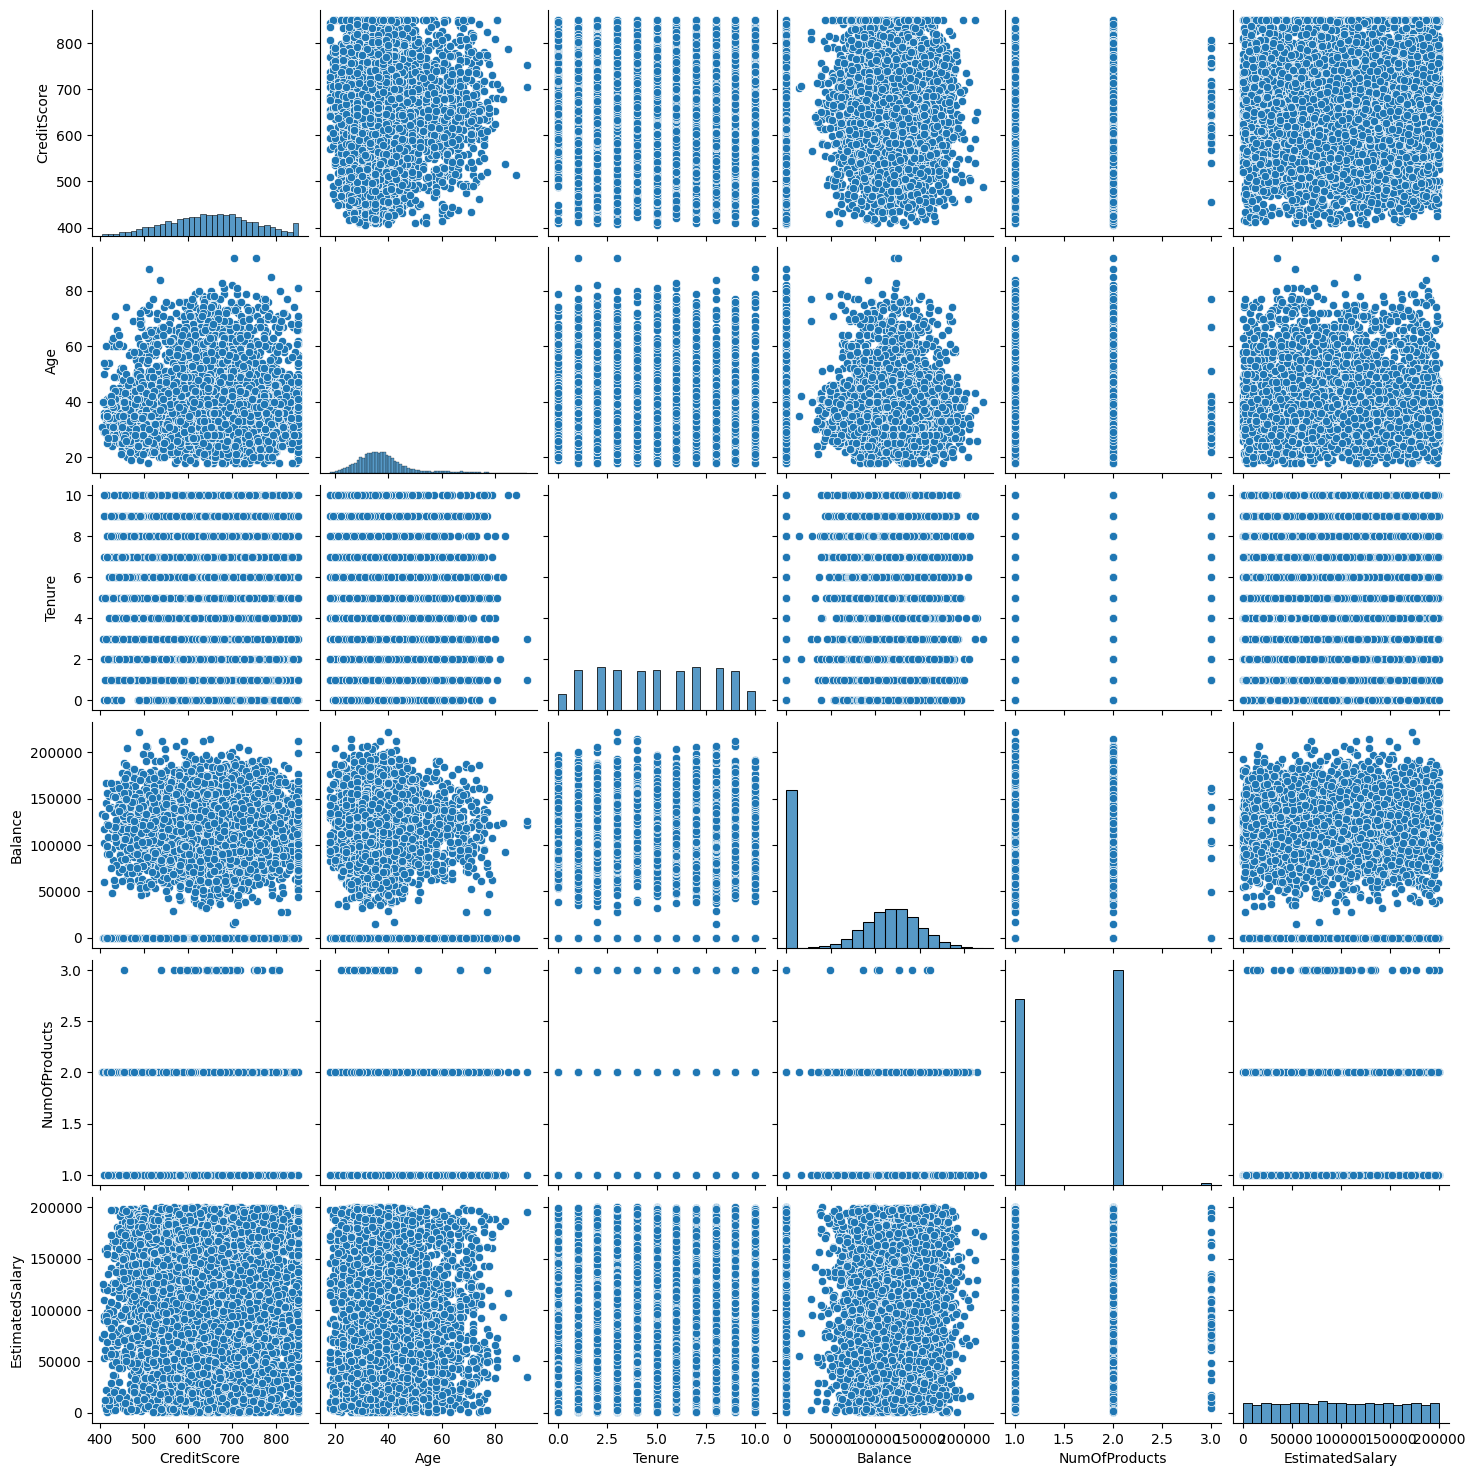

In [5]:
# Применяем фильтр, чтобы исключить строки, где "Exited" равно 1
numeric_columns = churn_data_df[churn_data_df["Exited"] == 0]

#numeric_columns = churn_data_df.select_dtypes(include=['float64', 'int64'])
numeric_columns = numeric_columns[["CreditScore", "Age","Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]]

# Удалим строки с пропущенными значениями, чтобы pairplot мог корректно работать
numeric_columns = numeric_columns.dropna()

# Создаем графики рассеяния с помощью pairplot
sns.pairplot(numeric_columns)
plt.show()

In [6]:
# Функция для вычисления коэффициента Крамера
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Вычисление корреляции Крамера между категориальными признаками и 'Exited'
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
correlations = {}
for col in categorical_columns:
    confusion_matrix = pd.crosstab(churn_data_df[col], churn_data_df['Exited'])
    corr = cramers_v(confusion_matrix)
    correlations[col] = corr

print(correlations)

{'Geography': 0.17299857464855709, 'Gender': 0.10579681691659651, 'HasCrCard': 0.0, 'IsActiveMember': 0.15556652756866268}


В какойто стране повышеный уход клиентов

In [7]:
from scipy.stats import f_oneway

# Выбираем уникальные значения категориального признака Geography
categories = churn_data_df['Exited'].unique()

# Инициализируем список для хранения результатов тестов
anova_results = []

# Проводим ANOVA для каждой категории
for category in categories:
    subset = churn_data_df[churn_data_df['Exited'] == category]
    anova_results.append(f_oneway(subset['EstimatedSalary'], subset['EstimatedSalary']))

# Выводим результаты
for i, category in enumerate(categories):
    print(f"ANOVA for {category}: F-statistic = {anova_results[i][0]}, p-value = {anova_results[i][1]}")


ANOVA for 1: F-statistic = 2.8923003060517417e-30, p-value = 1.0
ANOVA for 0: F-statistic = 3.338386337839927e-30, p-value = 1.0


In [8]:
categories=[1, 0]
box_data = churn_data_df[churn_data_df['Exited'].isin(categories)]
fig = px.box(data_frame = box_data, x = 'CreditScore', color='Exited')
fig.show()

C:\Users\nigilist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotly\express\_core.py:2044: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(required_grouper, sort=False)  # skip one_group groupers


In [9]:
categories=[1, 0]
box_data = churn_data_df[churn_data_df['Exited'].isin(categories)]
fig = px.box(data_frame = box_data, x = 'Age', color='Exited')
fig.show()
"""нужно убрать аномальные значения"""

C:\Users\nigilist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



'нужно убрать аномальные значения'

In [10]:
categories=[1, 0]
box_data = churn_data_df[churn_data_df['Exited'].isin(categories)]
fig = px.box(data_frame = box_data, x = 'Tenure', color='Exited')
fig.show()
"""Один из признаов ухода это малый или большой стаж"""

C:\Users\nigilist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



'Один из признаов ухода это малый или большой стаж'

In [11]:
categories=[1, 0]
box_data = churn_data_df[churn_data_df['Exited'].isin(categories)]
fig = px.box(data_frame = box_data, x = 'Balance', color='Exited')
fig.show()
"""Уходят Клиенты у которых нет маленькиъх балансов"""

C:\Users\nigilist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



'Уходят Клиенты у которых нет маленькиъх балансов'

In [12]:
categories=[1, 0]
box_data = churn_data_df[churn_data_df['Exited'].isin(categories)]
fig = px.box(data_frame = box_data, x = 'EstimatedSalary', color='Exited')
fig.show()
"""от зарплаты не зависит"""

C:\Users\nigilist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



'от зарплаты не зависит'

In [13]:
pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\nigilist\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

churn_data_df['Gender'] = label_encoder.fit_transform(churn_data_df['Gender'])
churn_data_df['HasCrCard'] = label_encoder.fit_transform(churn_data_df['HasCrCard'])
churn_data_df['IsActiveMember'] = label_encoder.fit_transform(churn_data_df['IsActiveMember'])
churn_data_df['Exited'] = label_encoder.fit_transform(churn_data_df['Exited'])
    
churn_data_df['fishka'] = churn_data_df["Gender"]*100 + churn_data_df["HasCrCard"]*10 + churn_data_df["IsActiveMember"]
churn_data_df['fishka12'] = churn_data_df["Gender"]*100 + churn_data_df["HasCrCard"]*10
churn_data_df['fishka13'] = churn_data_df["Gender"]*100  + churn_data_df["IsActiveMember"]
churn_data_df['fishka23'] = churn_data_df["HasCrCard"]*10 + churn_data_df["IsActiveMember"]

churn_data_df[['Gender', "HasCrCard", 'IsActiveMember', 'Exited','fishka12','fishka13','fishka23']] = \
    churn_data_df[['Gender', "HasCrCard", 'IsActiveMember', 'Exited','fishka12','fishka13','fishka23']].astype('category')

In [15]:
# Функция для вычисления коэффициента Крамера
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Вычисление корреляции Крамера между категориальными признаками и 'Exited'
categorical_columns = ['Gender', "HasCrCard", 'IsActiveMember', 'fishka','fishka12','fishka13','fishka23']
correlations = {}
for col in categorical_columns:
    confusion_matrix = pd.crosstab(churn_data_df[col], churn_data_df['Exited'])
    corr = cramers_v(confusion_matrix)
    correlations[col] = corr

print(correlations)

{'Gender': 0.10579681691659651, 'HasCrCard': 0.0, 'IsActiveMember': 0.15556652756866268, 'fishka': 0.18803549230009942, 'fishka12': 0.10530237472848192, 'fishka13': 0.18711037611950163, 'fishka23': 0.15763786544616948}


In [16]:
# Функция для вычисления коэффициента Крамера
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Вычисление корреляции Крамера между категориальными признаками и 'Exited'
categorical_columns = ['Geography','Gender', "HasCrCard", 'IsActiveMember']
correlations = {}
for col in categorical_columns:
    confusion_matrix = pd.crosstab(churn_data_df[col], churn_data_df['fishka'])
    corr = cramers_v(confusion_matrix)
    correlations[col] = corr

print(correlations)

{'Geography': 0.022186920879210384, 'Gender': 0.9996998949564789, 'HasCrCard': 0.9996998949564789, 'IsActiveMember': 0.999699894956479}


In [17]:
#считаем среднюю ежедневную заболеваемость по странам
churn_data_df_2 = churn_data_df[churn_data_df["Exited"] == 1]
treemap_data = churn_data_df_2['Geography'].value_counts().reset_index()
treemap_data.columns = ['Geography', 'count']

# Сортируем данные по количеству упоминаний (строк)
treemap_data = treemap_data.sort_values(by='count', ascending=False)

#строим график
fig = px.treemap(
    data_frame=treemap_data, #датафрейм
    path=['Geography'], #кат. признак, для которого строится график
    values='count',
    height=500, #высота
    width=700, #ширина
    title='Daily Recovered Cases by Country' #заголовок
)

#отображаем его
fig.show()

C:\Users\nigilist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Exited
0    7963
1    2037
Name: count, dtype: int64


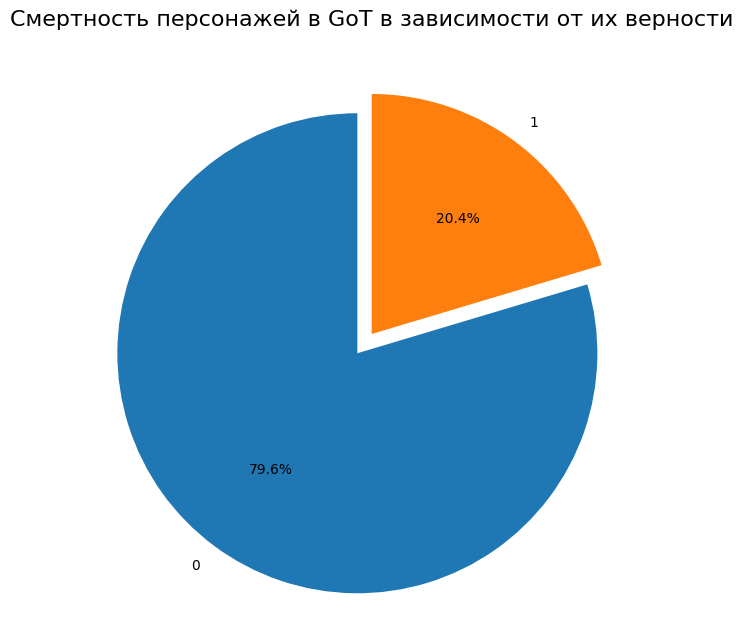

In [18]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))
deaths_count = churn_data_df['Exited'].value_counts().sort_values(ascending=False)
print(deaths_count)
pie = ax.pie(
    deaths_count,
    labels=deaths_count.index,
    autopct='%1.1f%%',
    explode = [0.1, 0],
    startangle=90
    
)
title = ax.set_title('Смертность персонажей в GoT в зависимости от их верности', fontsize=16)
plt.show(pie)

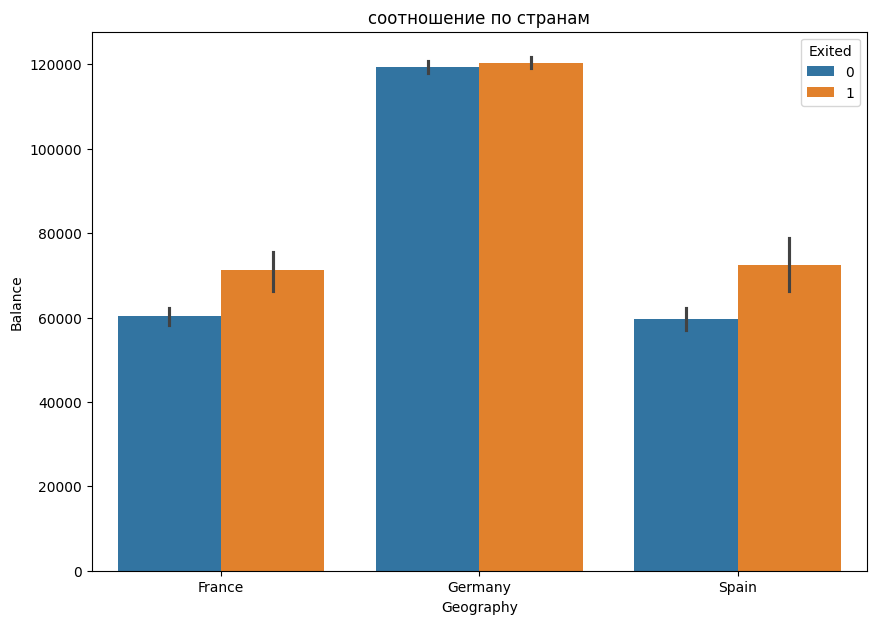

In [19]:


churn_data_df_2 = churn_data_df

fig = plt.figure(figsize=(10, 7))
#croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=churn_data_df_2,
    x='Geography',
    y='Balance',
    hue='Exited',
)
barplot.set_title('соотношение по странам');

C:\Users\nigilist\AppData\Local\Temp\ipykernel_2808\1843420443.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



NameError: name 'legend' is not defined

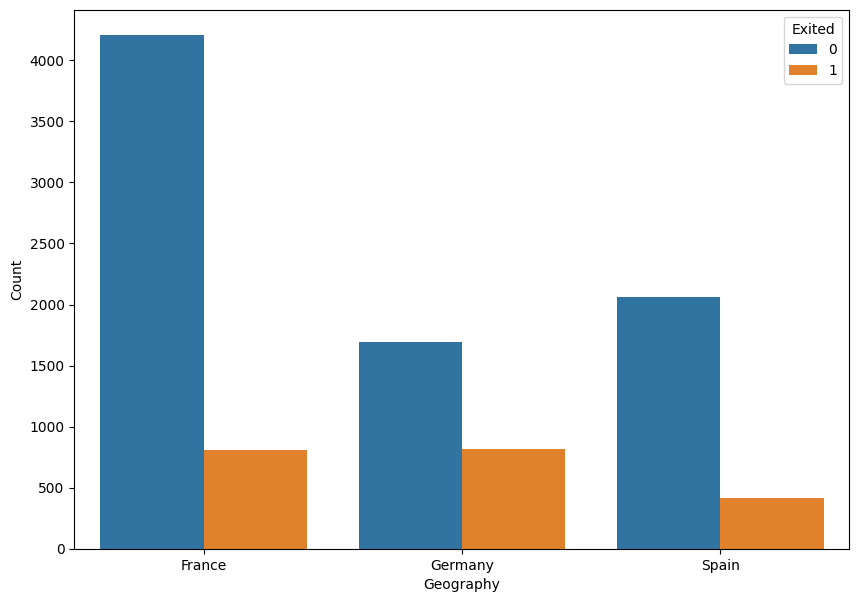

In [22]:
# Группируем данные по 'Geography' и 'Exited', а затем считаем количество строк в каждой группе
grouped_counts = churn_data_df.groupby(['Geography', 'Exited']).size().reset_index(name='Count')
vacc_country = churn_data_df['Exited'].value_counts().sort_values(ascending=False)
# Создаем график
fig= plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=grouped_counts,
    x='Geography',
    y='Count',
    hue='Exited',
)
legend.set_title('')
# Получаем легенду графика столбчатой диаграммы
legend = barplot.get_legend()
# Заменяем подписи в легенде
new_labels = ['Лояльные клиенты', 'Ураченные клиенты']
for text, label in zip(legend.texts, new_labels):
    text.set_text(label)
legend.set_title('')


barplot.set_ylabel('Клиенты компании')
barplot.set_xlabel(' ')
barplot.set_title('Cотношение лояльных и не лояльных клиентов по странам')

for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha='center', va='bottom', fontsize=12, color='black')

insert_axes = fig.add_axes([0.4, 0.46, 0.3, 0.4])
insert_axes.pie(vacc_country, autopct='%1.1f%%', startangle=90)
insert_axes.set_xlabel('Сумарное соотношение лояльных и\nне лояльных клиентов', labelpad=-111, fontsize=9, backgroundcolor=(1, 1, 1, 0.3))
insert_axes.axis('equal')  # Для круговой диаграммы


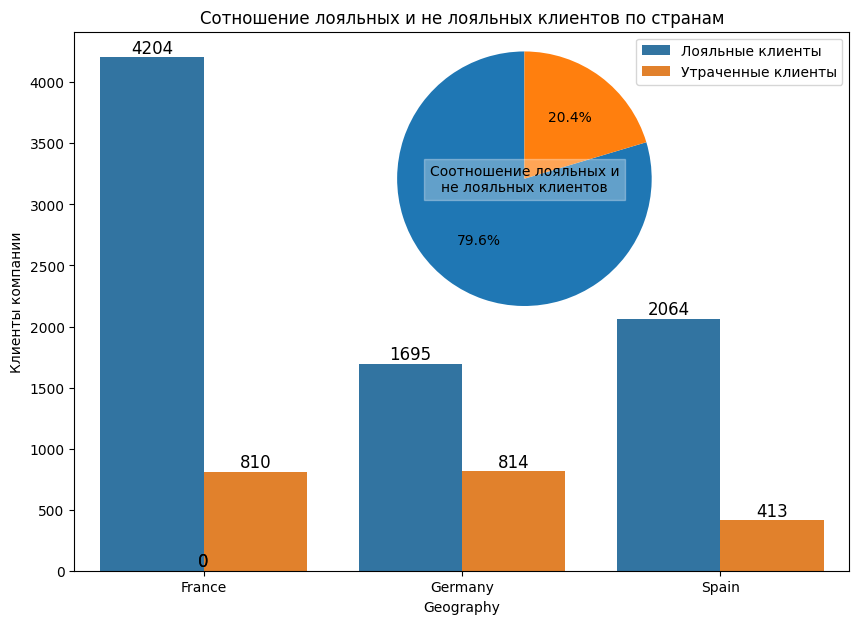

In [47]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Группируем данные по 'Geography' и 'Exited', а затем считаем количество строк в каждой группе
grouped_counts = churn_data_df.groupby(['Geography', 'Exited']).size().reset_index(name='Count')
vacc_country = churn_data_df['Exited'].value_counts().sort_values(ascending=False)

# Создаем график
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=grouped_counts,
    x='Geography',
    y='Count',
    hue='Exited',
)

barplot.set_ylabel('Клиенты компании')
barplot.set_title('Cотношение лояльных и не лояльных клиентов по странам')

for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=12, color='black')

# Получаем легенду графика столбчатой диаграммы
legend = barplot.get_legend()

# Убираем заголовок легенды
legend.set_title('')

# Заменяем подписи в легенде
new_labels = ['Лояльные клиенты', 'Утраченные клиенты']
for text, label in zip(legend.texts, new_labels):
    text.set_text(label)

insert_axes = fig.add_axes([0.4, 0.47, 0.35, 0.4])
insert_axes.pie(vacc_country, autopct='%1.1f%%', startangle=90)
insert_axes.set_xlabel('Соотношение лояльных и\nне лояльных клиентов', labelpad=-111, fontsize=10, backgroundcolor=(1, 1, 1, 0.3))
insert_axes.axis('equal')  # Для круговой диаграммы

plt.show()